In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/s1.csv')
data.head()

,date,time,open,high,low,close,volume,open_interest
0,2017-01-02,09:15:00,100.00,100.28,100.00,100.02,7000.0,100000.0
1,2017-01-02,09:16:00,100.02,100.07,100.02,100.06,3509.0,101212.0
2,2017-01-02,09:17:00,100.05,100.06,99.70,99.73,5105.0,101212.0
3,2017-01-02,09:18:00,99.71,99.79,99.63,99.79,4959.0,101212.0
4,2017-01-02,09:19:00,99.78,99.82,99.69,99.70,2398.0,102480.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673384 entries, 0 to 673383
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           673384 non-null  object 
 1   time           673384 non-null  object 
 2   open           673384 non-null  float64
 3   high           673384 non-null  float64
 4   low            673384 non-null  float64
 5   close          673384 non-null  float64
 6   volume         673384 non-null  float64
 7   open_interest  673384 non-null  float64
dtypes: float64(6), object(2)
memory usage: 41.1+ MB


In [ ]:
data.describe()

,open,high,low,close,volume,open_interest
count,673384.000000,673384.000000,673384.000000,673384.000000,673384.000000,673384.000000
mean,176.523172,176.580113,176.466306,176.523310,1474.010413,101125.616752
std,44.845303,44.850573,44.839592,44.845318,1896.214092,37082.227375
min,88.270000,88.760000,87.980000,88.280000,0.000000,0.000000
25%,139.490000,139.530000,139.460000,139.490000,446.000000,82293.000000
50%,169.290000,169.350000,169.230000,169.290000,892.000000,98964.000000
75%,210.530000,210.600000,210.460000,210.530000,1795.000000,117471.000000
max,274.030000,274.170000,273.910000,274.030000,293657.000000,908767.000000


In [ ]:
cema = [] #close moving average
n = 10
dates = data['date'].unique()
for date in dates:
  day = data[data['date'] == date]
  cema.append(day['close'].iloc[0])
  for i in range(1, len(day)):
    cema.append((day['close'].iloc[i] * (2 / (1 + n))) + (cema[-1] * (1 - (2 / (1 + n)))))

In [ ]:
df = pd.DataFrame({'datetime': pd.to_datetime(data['date'] + ' ' + data['time']),
                   'day': pd.to_datetime(data['date'] + ' ' + data['time']).dt.dayofweek,
                   'time': data['time'].str[:2],
                   'oc': data['close'] - data['open'],
                   'hl': data['high'] - data['low'],
                   'cema': cema,
                   'opnorm': data['open'] - cema,
                   'hinorm': data['high'] - cema,
                   'lonorm': data['low'] - cema,
                   'clnorm': data['close'] - cema,
                   'vol': data['volume'],
                   'opin': data['open_interest']})
df.tail(15)
#another column 'colour' would be added once the threshold for neutrality is decided

,datetime,day,time,oc,hl,cema,opnorm,hinorm,lonorm,clnorm,vol,opin
673369,2024-05-24 15:15:00,4,15,-0.04,0.23,269.422920,0.007080,0.087080,-0.142920,-0.032920,3688.0,111354.0
673370,2024-05-24 15:16:00,4,15,0.00,0.10,269.426025,0.013975,0.083975,-0.016025,0.013975,1243.0,111900.0
673371,2024-05-24 15:17:00,4,15,-0.04,0.11,269.417657,0.002343,0.062343,-0.047657,-0.037657,544.0,111900.0
673372,2024-05-24 15:18:00,4,15,-0.03,0.13,269.405356,-0.025356,0.024644,-0.105356,-0.055356,934.0,111900.0
673373,2024-05-24 15:19:00,4,15,0.06,0.11,269.408018,-0.048018,0.051982,-0.058018,0.011982,866.0,111995.0
673374,2024-05-24 15:20:00,4,15,0.04,0.07,269.417470,0.002530,0.052530,-0.017470,0.042530,835.0,111995.0
673375,2024-05-24 15:21:00,4,15,-0.01,0.06,269.423384,0.036616,0.046616,-0.013384,0.026616,792.0,111995.0
673376,2024-05-24 15:22:00,4,15,-0.04,0.09,269.420951,0.029049,0.029049,-0.060951,-0.010951,590.0,111655.0
673377,2024-05-24 15:23:00,4,15,0.01,0.04,269.417141,-0.027141,-0.017141,-0.057141,-0.017141,827.0,111655.0
673378,2024-05-24 15:24:00,4,15,-0.03,0.07,269.408570,-0.008570,0.021430,-0.048570,-0.038570,2121.0,111655.0


In [ ]:
#data subsets for checking clusters and running EDA
usedata = data.tail(60000)
usedf = df.tail(60000)
#collapsing plots not needed now
#they affected performance negatively
'''import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=usedf['datetime'],
                open=usedata['open'],
                high=usedata['high'],
                low=usedata['low'],
                close=usedata['close'])])
fig.show()'''

"import plotly.graph_objects as go\nfig = go.Figure(data=[go.Candlestick(x=usedf['datetime'],\n                open=usedata['open'],\n                high=usedata['high'],\n                low=usedata['low'],\n                close=usedata['close'])])\nfig.show()"

In [ ]:
'''fig = go.Figure(data=[go.Candlestick(x=usedf['datetime'],
                open=usedf['opnorm'],
                high=usedf['hinorm'],
                low=usedf['lonorm'],
                close=usedf['clnorm'])])
fig.show()'''

"fig = go.Figure(data=[go.Candlestick(x=usedf['datetime'],\n                open=usedf['opnorm'],\n                high=usedf['hinorm'],\n                low=usedf['lonorm'],\n                close=usedf['clnorm'])])\nfig.show()"

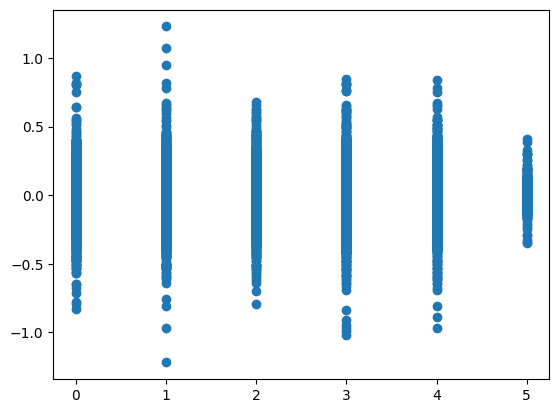

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(usedf['day'], usedf['oc'])
plt.show()
#tuesday had more spikes and falls, saturday is latent, more fluctuations are at the start and end of work week

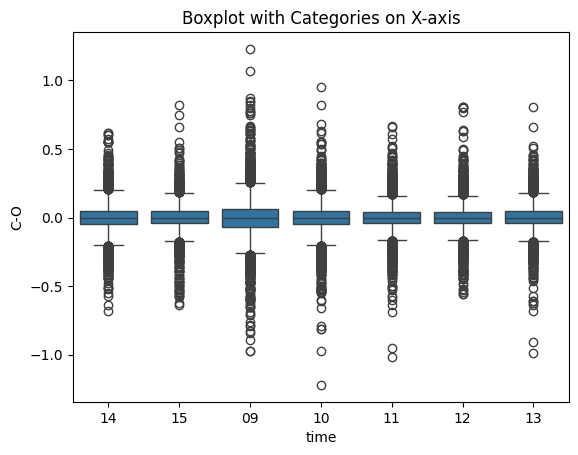

In [ ]:
import seaborn as sns
sns.boxplot(x='time', y='oc', data=usedf)
plt.xlabel('time')
plt.ylabel('C-O')
plt.title('Boxplot with Categories on X-axis')
plt.show()
plt.show()
#high volatility in first two hours and the last hour before market closing, tranquil at the closing and during mealtime
#volatility generally sees a slowing trend

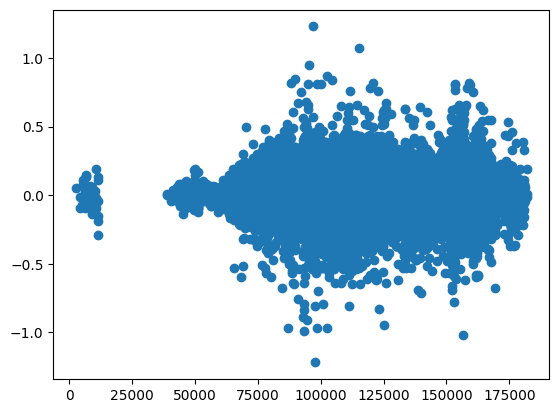

In [ ]:
plt.scatter(usedata['open_interest'], usedf['oc'])
plt.show()
#needs more analysis

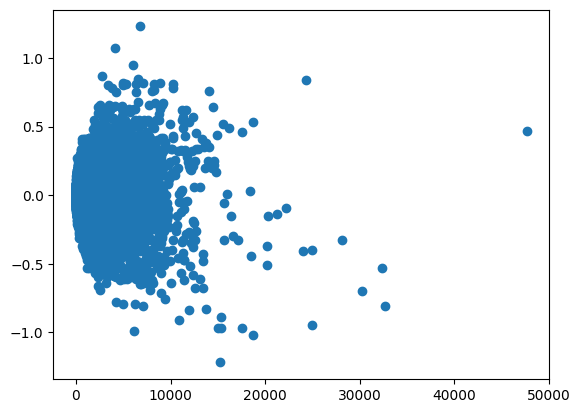

In [ ]:
plt.scatter(usedf['vol'], usedf['oc'])
plt.show()

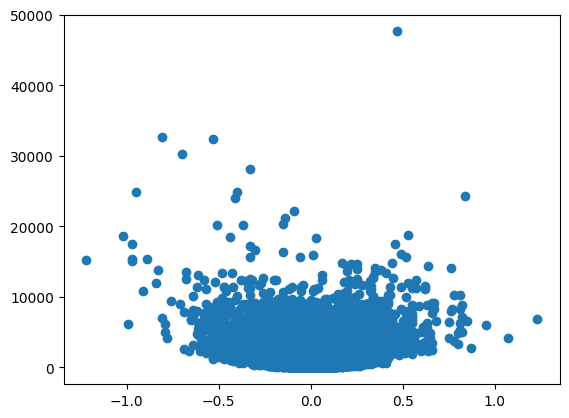

In [ ]:
plt.scatter(usedf['oc'], usedf['vol'])
plt.show()
#this relationship needs more analysis

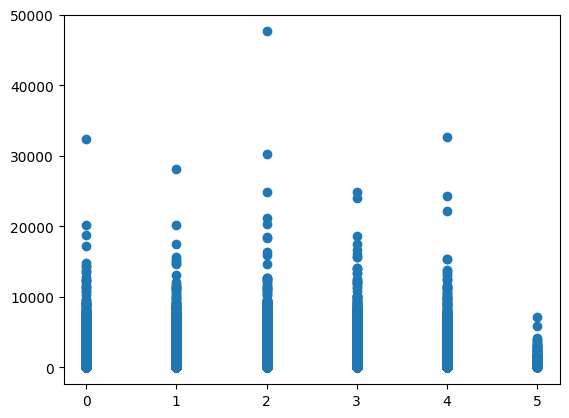

In [ ]:
plt.scatter(usedf['day'], usedf['vol'])
plt.show()
#trading goes slow on saturday
#tuesday, which had been found to be volatile, has fewer transactions
#wednesday was tranquil, but has volume spikes
#wednesday is the day for prudent trading, as fluctuations are low and volume is high

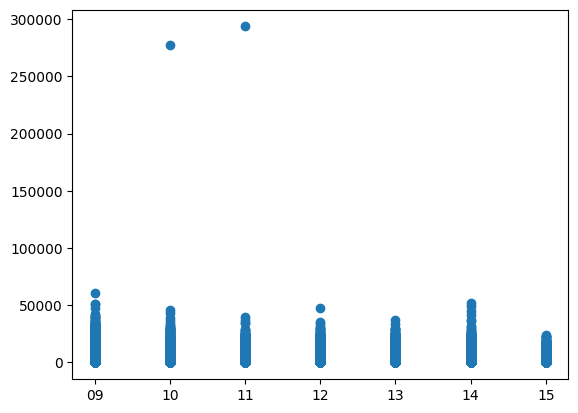

In [ ]:
plt.scatter(df['time'].str[:2], df['vol'])
plt.show()
#volume slumps in midday, and reduces at the closing time

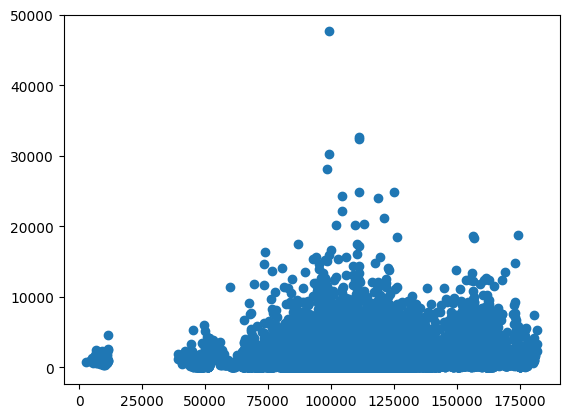

In [ ]:
plt.scatter(usedata['open_interest'], usedf['vol'])
plt.show()

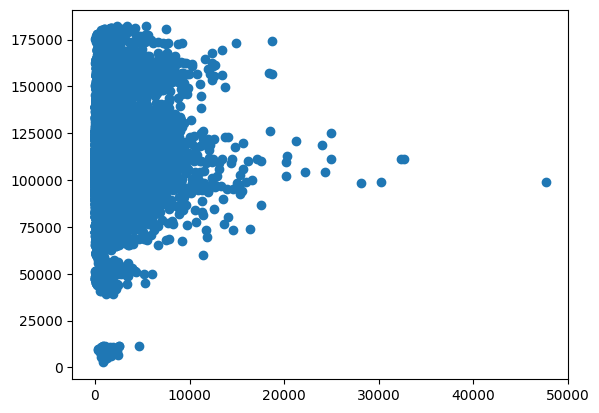

In [ ]:
plt.scatter(usedf['vol'], usedata['open_interest'])
plt.show()
#more analysis is required

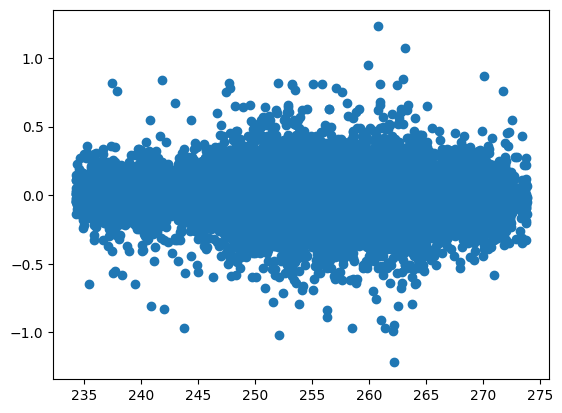

In [ ]:
plt.scatter(usedf['cema'], usedf['oc'])
plt.show()
#more clarity is needed

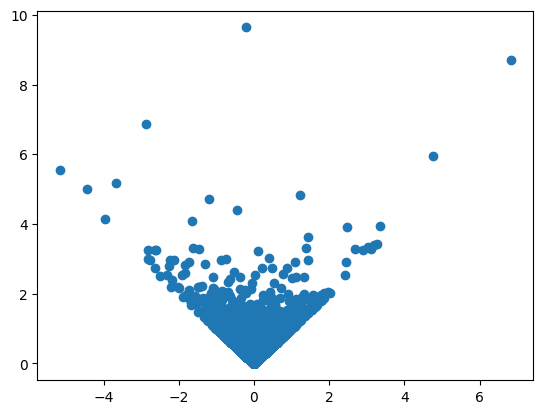

In [ ]:
plt.scatter(df['oc'], df['hl'])
plt.show()
#as expected, high hl leads to high oc magnitude

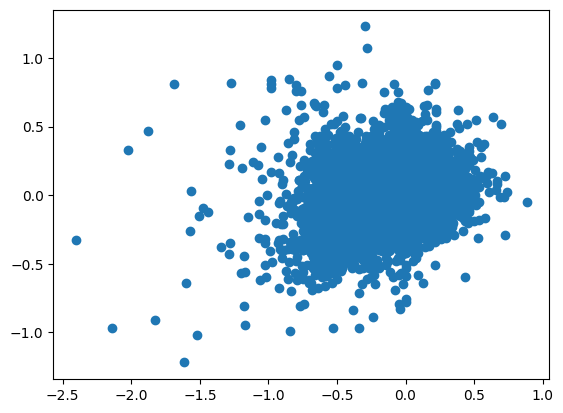

In [ ]:
plt.scatter(usedf['lonorm'], usedf['oc'])
plt.show()
#obvious: oc and clnorm are linearly related, oc and opnorm are inversely related
#+ve hinorm and -ve lonorm usually lead to +ve oc

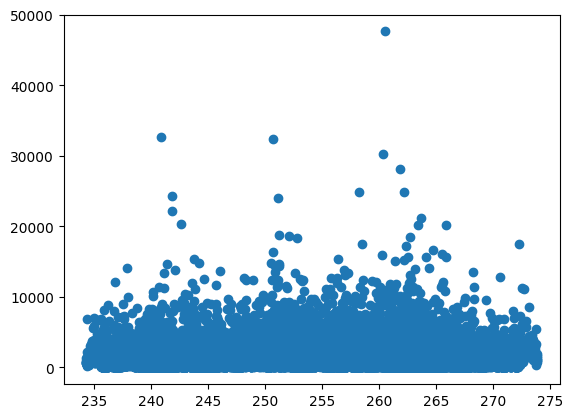

In [ ]:
plt.scatter(usedf['cema'], usedf['vol'])
plt.show()
#more analysis is needed

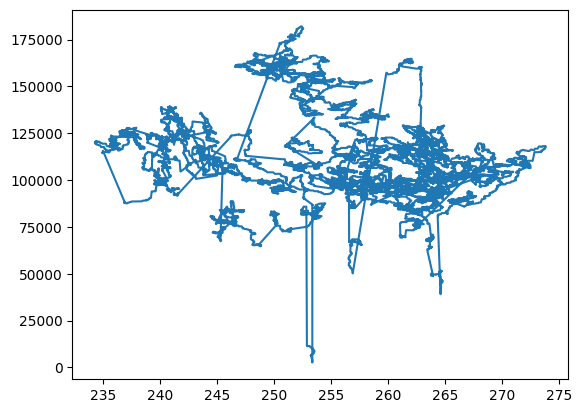

In [ ]:
plt.plot(usedf['cema'], usedata['open_interest'])
plt.show()
#caught off guard, needs to be scrutinised

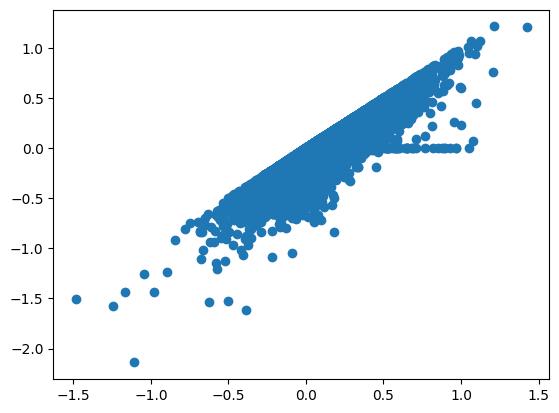

In [ ]:
plt.scatter(usedf['hinorm'], usedf['clnorm'])
plt.show()
#OHCL relations: nothing interesting at the first glance, may become useful later

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


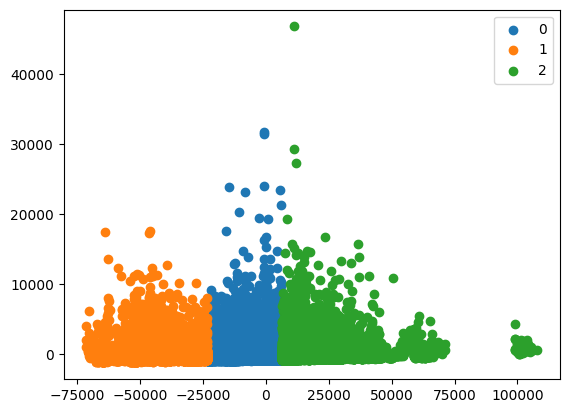

In [ ]:
#using oc as a check for candle colour
# the last
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
cdf = usedf[['cema', 'oc', 'vol', 'opin']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(cdf)
labels = kmeans.predict(cdf)
u_labels = np.unique(labels)
pcdf = PCA(2).fit_transform(cdf)
for i in u_labels:
    plt.scatter(pcdf[labels == i, 0], pcdf[labels == i, 1], label = i)
plt.legend()
plt.show()

In [ ]:
kmeans.cluster_centers_

array([[ 2.53414877e+02,  6.79005625e-04,  9.14337216e+02,
         1.15890281e+05],
       [ 2.52568775e+02,  9.03426791e-04,  1.29010307e+03,
         1.51751762e+05],
       [ 2.58152520e+02, -5.33476977e-04,  8.83131833e+02,
         9.23651151e+04]])